# Variation de vitesse et somme des forces appliquées au système

## 1. Dispositif
- Ordinateur muni du logiciel de pointage vidéo _Aviméca_
- Webcam éventuellement (le film peut-être fourni par le professeur)
- Pâte à modeler
- Balance
- Environnement _python_

## 2.Mesures
On utilisera la vidéo fournie par le professeur du mouvement parabolique d’une balle de pâte à modeler lancée dans le champ de pesanteur comme indiqué dans le document 1 (la vidéo est nommée ` champ_pesanteur.avi` et la masse de la balle est `m=22,6g`).

- Lancez le logiciel _Aviméca_ et ouvrir la vidéo.
- Le tableau métallique beige a longueur 60 cm et pour largeur 38 cm. Précisez les réglages à effectuer avant de commencer le pointage du mouvement du centre d’inertie G de la balle.
- Relevez les positions successives du centre d’inertie G de la balle en cliquant avec soin sur son image.
- Une fois la dernière position repérée, enregistrez les données dans un fichier texte nommé `pesanteur.txt` (séparateur point virgule).
- Précisez quelles sont les grandeurs mesurées par le logiciel.

## 3 Tracé du vecteur variation de vitesse

<div class="alert alert-block alert-info">
    
- Téléverser le fichier `pesanteur.txt` dans le même dossier que ce notebook.
- Exécutez la cellule ci-dessous: le programme python va charger les valeurs des pointages contenus dans le fichier `pesanteur.txt`. Ces valeurs seront placées dans 3 tableaux nommées `T`, `X` et `Y`. Ces tableaux représentent respectivement le temps, l’abscisse et l’ordonnée des points du mouvement.
</div>

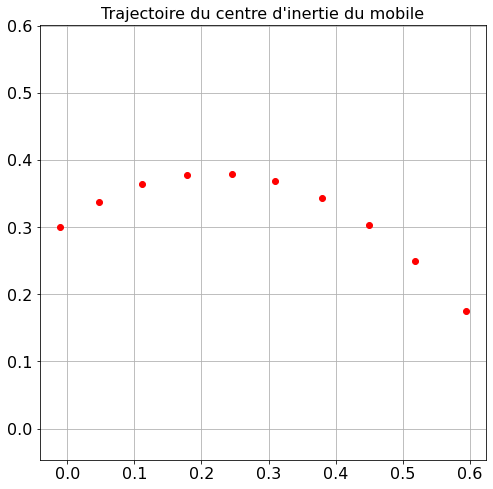

In [1]:
import numpy as np
from numpy import array as npa
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display, Latex

# lecture du fichier aviméca
S_fic = "pesanteur.txt"
fichier = open(S_fic,"r")
S=fichier.read()
fichier.close()
if S.count(',')!=0 :
    S=S.replace(",",".")
    fichier = open(S_fic, "w")
    fichier.write(S)
    fichier.close()
file = np.loadtxt(S_fic, skiprows=3, delimiter=";")
inter = 1
T = [file[ :,0][i] for i in range(len(file)) if i % inter == 0]
X = [file[ :,1][i] for i in range(len(file)) if i % inter == 0]
Y = [file[ :,2][i] for i in range(len(file)) if i % inter == 0]

# Fonction de tracé de vecteur
def trace_vecteur(M, V, C, nom='', z=0):
    δ = 0.010
    av.quiver(M[0], M[1], V[0], V[1], angles='xy', scale_units='xy', scale=echelle, color=C, width=e, zorder=z)
    if nom != '':
        plt.text(M[0]+V[0]/(2*echelle)+δ, M[1]+V[1]/(2*echelle), '$\overrightarrow{{{}}}$'.format(nom), color =C, fontsize=16)

# graphique
fig1, av = plt.subplots(figsize=(8, 8))
plt.axis('equal')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Trajectoire du centre d'inertie du mobile",fontsize = 16)
circle=plt.Circle((0,0), 0.005, linewidth=1, facecolor='b', edgecolor='b')
plt.plot(X, Y, 'o', color="red", label='Positions')
plt.grid()
plt.show()

On souhaite effectuer le tracé du vecteur variation de vitesse $\overrightarrow{\Delta V}$ au point $M$ d'indice $i=3$. Le point précédent $M$ sera noté $A$ et le point suivant $M$ sera noté $B$.

<div class="alert alert-block alert-info">
    
Complétez la cellule ci-dessous en indiquant les coordonnées des points $A$, $M$ et $B$ en fonction des tableaux `T`, `X` et `Y` ainsi que de l’indice `i`.
</div>    

In [2]:
# indice du point M
i = 3

# Coordonnées des points A, M, B
A = (X[i-1], Y[i-1])
M = (X[i], Y[i])
B = (X[i+1], Y[i+1])

<div class="alert alert-block alert-info">
Exécutez le code ci-dessous pour afficher les points $A$, $B$ et $M$ sur le graphique.
</div>

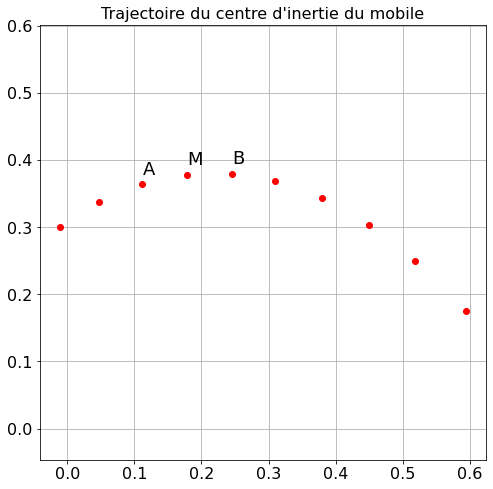

In [3]:
fig2 = plt.figure(fig1)
δ = 0.015
plt.text(A[0], A[1]+δ, 'A', fontsize=18)
plt.text(M[0], M[1]+δ, 'M', fontsize=18)
plt.text(B[0], B[1]+δ, 'B', fontsize=18)
plt.show()

<div class="alert alert-block alert-info">

- Complétez le code ci-dessous pour exprimer les coordonnées des vecteurs $\overrightarrow{V_A}$ et $\overrightarrow{V_B}$ en fonction des tableaux $X$, $Y$ et $T$ ainsi que de l'indice $i$.
- Complétez également le code pour exprimer les vecteurs $\overrightarrow{V_A}$ et $\overrightarrow{V_B}$ en fonction de leurs coordonnées.
- Exécutez le code.
</div>

In [4]:
# Coordonnées des vecteurs vitesses en A et B
VAx = (X[i] - X[i-2]) / (T[i] - T[i-2])
VAy = (Y[i] - Y[i-2]) / (T[i] - T[i-2])
𝑽𝑨 = (VAx, VAy)
VBx = (X[i+2] - X[i]) / (T[i+2] - T[i])
VBy = (Y[i+2] - Y[i]) / (T[i+2] - T[i])
𝑽𝑩 = (VBx, VBy)
# affichage
display(Latex('Coordonnées du vecteur $\overrightarrow{{V_A}}$ : ({:.2f}, {:.2f})'.format(𝑽𝑨[0], 𝑽𝑨[1])))
display(Latex('Coordonnées du vecteur $\overrightarrow{{V_B}}$ : ({:.2f}, {:.2f})'.format(𝑽𝑨[0], 𝑽𝑨[1])))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<div class="alert alert-block alert-info">

- Complétez le code ci-dessous en ajoutant le tracé des vecteurs $\overrightarrow{V_A}$ au point $A$ et $\overrightarrow{V_B}$ au point $B$ en utilisant la couleur bleue (blue).
- Exécutez ce code pour afficher les vecteurs $\overrightarrow{V_A}$ et $\overrightarrow{V_B}$ sur le graphique.
</div>

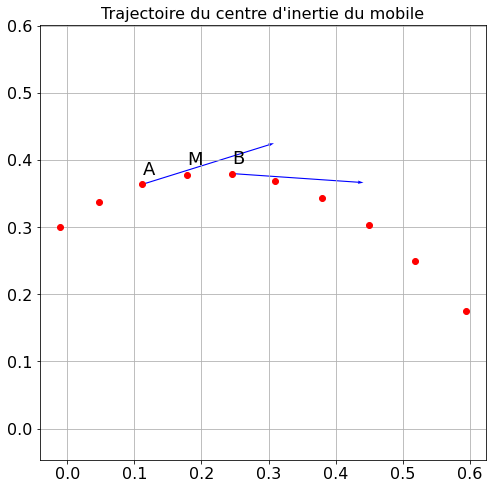

In [5]:
fig3 = plt.figure(fig2)
e = 0.0025 # épaisseur
echelle = 10
trace_vecteur(A, 𝑽𝑨, 'blue')
trace_vecteur(B, 𝑽𝑩, 'blue')
plt.show()

#### Coordonnées du vecteur variation de vitesse au point M
<div class="alert alert-block alert-info">

- Exprimez les coordonnée du vecteur variation de vitesse $\overrightarrow{\Delta V}$ au point $M$ en fonctions de celles des vecteurs $\overrightarrow{V_A}$ et $\overrightarrow{V_B}$.
- Complétez l'expression du vecteur $\overrightarrow{\Delta V}$.
- Exécutez le code.
</div>

In [6]:
# Expression du vecteur variation de vitesse au point M
ΔVx = VBx - VAx
ΔVy = VBy - VAy
𝜟𝑽 = (ΔVx, ΔVy)
# affichage
display(Latex('Coordonnées du vecteur $\overrightarrow{{\Delta V}}$ : ({:.2f}, {:.2f})'.format(𝜟𝑽[0], 𝜟𝑽[1])))

<IPython.core.display.Latex object>

<div class="alert alert-block alert-info">

Pour effectuer la construction de $\overrightarrow{\Delta V}$, on souhaite ajouter le tracé suivant:
* Vecteur $\overrightarrow{V_B}$ au point $M$, tracé en vert (green)
* Vecteur $-\overrightarrow{V_A}$  au point $M$, tracé en vert (green)
* Vecteur $\overrightarrow{\Delta V}$ au point $M$, tracé en rouge (red)

Complétez le code correspondant et l'exécuter.
</div>

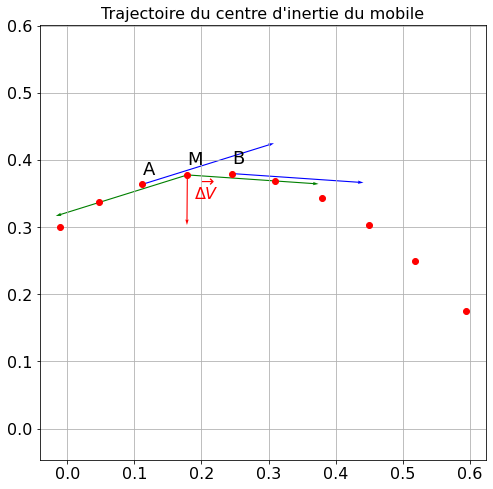

In [7]:
fig4 = plt.figure(fig3)
trace_vecteur(M, 𝑽𝑩, 'green')
trace_vecteur(M, (-VAx, -VAy), 'green')
trace_vecteur(M, 𝜟𝑽, 'red', nom='ΔV')
plt.show()

<div class="alert alert-block alert-info">

- Exprimez les coordonnée du vecteur $\overrightarrow{\Sigma F} = m \cdot \dfrac{\overrightarrow{\Delta V}} {\Delta t}$ au point $M$ en fonctions de celles du vecteur $\overrightarrow{\Delta V}$.
- Complétez l'expression du vecteur $\overrightarrow{\Sigma F}$.
- Exécutez le code.

</div>

In [8]:
# calculs de ΣF = m * ΔV / Δt
m = 22.6e-3
ΣF_x = m * 𝜟𝑽[0] / (T[i+1] - T[i-1])
ΣF_y = m * 𝜟𝑽[1] / (T[i+1] - T[i-1])
𝜮𝑭 =(ΣF_x, ΣF_y)
# affichage
display(Latex('''Coordonnées du vecteur $\overrightarrow{{\Sigma F}} =
                 m \cdot \dfrac{{\overrightarrow{{\Delta V}}}} {{\Delta t}}$ :
                 ({:.2f}, {:.2f})'''.format(𝜮𝑭[0], 𝜮𝑭[1])))

<IPython.core.display.Latex object>

<div class="alert alert-block alert-info">

- Complétez le code ci-dessous pour effectuer la construction de $\overrightarrow{\Sigma F}$ au point $M$ en orange (orange) correspondant.
- Exécutez le code.
</div>

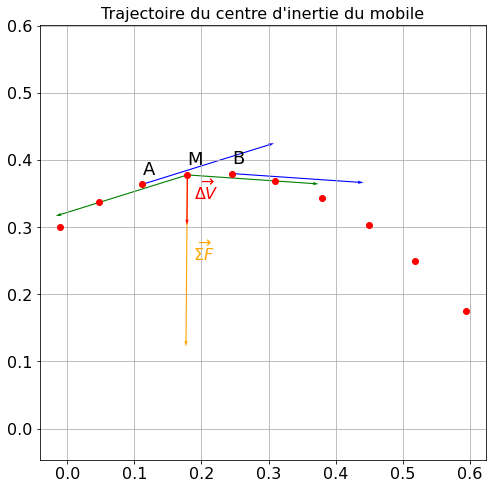

In [9]:
fig5 = plt.figure(fig4)
echelle = 1
trace_vecteur(M, 𝜮𝑭, 'orange', nom='ΣF', z=-1)
plt.show()

## 4. A propos du vecteur  $\overrightarrow{\Delta V}$
### a. Direction et sens

<div class="alert alert-block alert-info">
    
Quelle est la direction du vecteur $\overrightarrow{\Sigma F} = m \cdot \dfrac{\overrightarrow{\Delta V}} {\Delta t}$
</div>     

Le vecteur $\overrightarrow{\Sigma F} = m \cdot \dfrac{\overrightarrow{\Delta V}} {\Delta t}$ est de direction `verticale`.

<div class="alert alert-block alert-info">
    
Quel est son sens ?
</div>    

Son sens est `vers le bas`.

### b. Valeur

<div class="alert alert-block alert-info">

- Complétez la cellule ci-dessous et exécutez la.
- Exécutez à nouveau la cellule qui permet de tracer le graphique.    
</div>    


In [10]:
# valeur de b = m*dv/dt
valeur_𝜮𝑭 = sqrt(𝜮𝑭[0]**2+𝜮𝑭[1]**2)

# affichage
display(Latex('''La valeur du vecteur $\overrightarrow{{\Sigma F}}$ est
                 $\Sigma F = {:.2f}~kg.m.s^{{-2}}$'''.format(valeur_𝜮𝑭)))

<IPython.core.display.Latex object>

### 5. Bilan des forces s’exerçant sur le système

<div class="alert alert-block alert-info">
    
Réalisez le bilan des forces qui s’exercent sur le système `{balle}`.
</div>

Le système {balle} est soumis uniquement à son poids $\overrightarrow{P}$ de direction `verticale` et de sens `vers le bas`.

<div class="alert alert-block alert-info">
    
Peut-on considérer la balle en chute libre ?
</div>    

La balle peut-être consédiée comme étant en chute libre car elle est soumise uniquement à son poids $\overrightarrow{P}$.

<div class="alert alert-block alert-info">
    
Donnez les caractéristiques de cette force (direction, sens, valeur).
</div>    

Le poids $\overrightarrow{P}$ est :
- de direction `verticale`
- de sens `vers le bas`
- de valeur $P= m \times g$, c'est à dire $P= 22,6 \times 10^{-3} \times 9,81$ soit $P = 0,22 N$.

<div class="alert alert-block alert-info">
    
Comparez cette force au vecteur $m \times \dfrac{\overrightarrow{\Delta V}}{\Delta t}$. Conclure.
</div>

On constate que :
    
$$\overrightarrow{P} = m \times \dfrac{\overrightarrow{\Delta V}}{\Delta t}$$

<div class="alert alert-block alert-info">
 
### Bonus
    
En utilisant les calculs numériques précédents, complétez les coordonnées du vecteur $\overrightarrow{P}$ (de façon numérique) et exécuter le code pour tracer le vecteur $\overrightarrow{P}$ sur le graphique au point **C**.
</div>

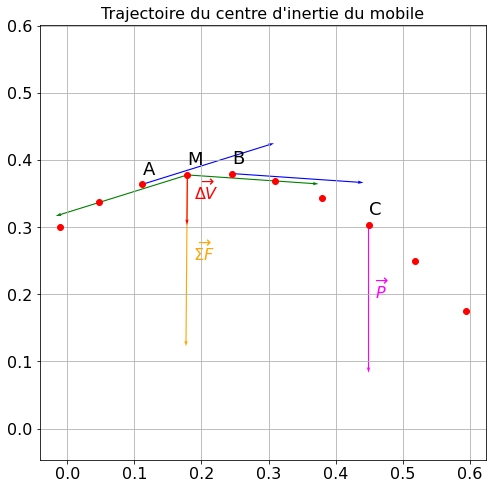

In [10]:
fig6 = plt.figure(fig5)
echelle = 1
j = 4
C = (X[i+j], Y[i+j])
plt.text(C[0], C[1]+δ, 'C', fontsize=18)
P_x = 0
P_y = -0.22
𝑷 = (P_x, P_y)
trace_vecteur(C, 𝑷, 'magenta', nom='P')
plt.show()
